In [15]:
import math
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
%matplotlib inline

Vamos considerar um conjunto de dados sintéticos de 30 pontos amostrados de uma 

*   List item
*   List item

função senoidal $y = \sin(4x)$:

In [16]:
def f(x):
    return np.sin(np.multiply(4,x))

Abaixo criamos valores aleatéorios para $x$ no intervalo [0,1)

In [17]:
random.seed(98103)
n = 30 # quantidade de valores gerados
x = np.array([random.random() for _ in range(n)])  #em cada iteração gera um valor aleatório entre 0 e 1
x=np.sort(x) # ordena os valores em ordem crescente
#transforma o array em uma matrix com uma n linhas e 1 coluna (vetor coluna)
X = x[:,np.newaxis]

Calcula $y$ como uma função de $x$. $y$ é chamada variável independente pois depende de $x$

In [18]:
Y = f(x)

Adiciona ruído Gaussiano aleatório à $y$

In [19]:
random.seed(1)
#ruído é amostrado de uma distribuição normal com média 0 e desvio padrão 1/3
e = np.array([random.gauss(0,1.0/3.0) for i in range(n)]) 
Y = Y + e

# Funções Auxiliares

Função para plotar os dados (scatter plot)

In [20]:
def plot_data(X,Y):    
    plt.plot(X,Y,'k.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([0,1,-1.5,2])

Função para imprimir coeficientes

In [21]:
def print_coefficients(model):    
    # Retorna o grau do polinômio
    deg = len(model.steps[1][1].coef_)-1
    # Obtém os parâmetros estimados
    w = list(model.steps[1][1].coef_) #model.steps é usado pois o modelo é calculado usando make_pipile do scikit learn
    # Numpy tem uma função para imprimir o polinômio mas os parâmetros precisam estar na ordem inversa
    print ('Polinômio estimado para grau ' + str(deg) + ':')
    w.reverse()
    print (np.poly1d(w)+model.steps[1][1].intercept_)

Função para calcular uma regressão polinomial para qualquer grau usando scikit learn.

In [22]:
def polynomial_regression(X,Y,deg):
    model = make_pipeline(PolynomialFeatures(deg),LinearRegression()) 
    model.fit(X,Y)
    return model

Função para plotar o modelo por meio de suas predições

In [ ]:
def print_poly_predictions(X,Y, model):
    plot_data(X,Y)
    x_plot = np.array([i/200.0 for i in range(200)])
    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X_plot)
    plt.plot(x_plot,y_pred,'g-')
    plt.axis([0,1,-1.5,2])

In [23]:
def plot_residuals_vs_fit(X,Y, model):
#    plot_data(X,Y)
#    x_plot = np.array([i/200.0 for i in range(200)])
#    X_plot = x_plot[:,np.newaxis]
    y_pred = model.predict(X)
    res = Y - y_pred
    plt.plot(y_pred,res,'k.',color='blue',)
    plt.axhline(y=0., color='r', linestyle='-')
    plt.xlabel("predictions")
    plt.ylabel("residuals")

# Função geradora

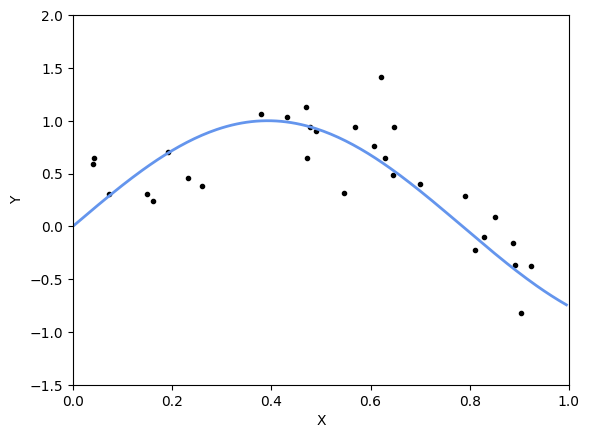

In [24]:
plot_data(X,Y)
x_plot = np.array([i/200.0 for i in range(200)])
y_plot = f(x_plot)
plt.plot(x_plot,y_plot,color='cornflowerblue',linewidth=2)

# Regressão Polinomial de Diferentes Graus

In [26]:
model = polynomial_regression(X,Y,1)
print_poly_predictions(X,Y,model) 

NameError: name 'print_poly_predictions' is not defined

In [ ]:
plot_residuals_vs_fit(X,Y, model)

Mostrando os coeficientes da regressão

In [ ]:
print_coefficients(model)

# Regressão Ridge

A regressão ridge se propõe a evitar o overfitting adicionando um custo ao RSS (dos mínimos quadrados) que depende da norma L2 dos coeficientes  ‖𝑤‖  (ou seja da magnitude dos coeficientes). O resultado é a penalização de ajustes com coeficientes muito grandes. A força dessa penalidade é controlada por um parâmetro lambda (aqui chamado "L2_penalty").

Função para estimar a regressão ridge para qualquer grau de polinômio:

In [ ]:
def polynomial_ridge_regression(X,Y, deg, l2_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Ridge(alpha=l2_penalty)) 
    model.fit(X,Y)
    return model

Ridge com grau 16 usando uma penalidade muito pequena

In [ ]:
model = polynomial_ridge_regression(X,Y,deg=16,l2_penalty=1e-14)
print_coefficients(model)

In [ ]:
print_poly_predictions(X,Y,model)    

Ridge com grau 16 usando uma penalidade muito grande

In [ ]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=100)
print_coefficients(model)

In [ ]:
print_poly_predictions(X,Y,model) 

## Sequência de ajustes para uma sequência crescente de valores de lambda

In [ ]:
for l2_penalty in [1e-10, 1e-8, 1e-6, 1e-3, 1, 1e1, 1e2]:
    model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=l2_penalty)
    print('lambda = %.2e' % l2_penalty)
    print_coefficients(model)
    print('\n')
    plt.figure()
    print_poly_predictions(X,Y,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

## Usando validação cruzada para encontrar o melhor lembda para Regressão Ridge

A função abaixo calcula os rmses (root mean squared error) para um certo modelo considerando todos os k folds (parâmetro cv na função cross_val_score do scikit learn).

In [ ]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X,Y,scoring="neg_mean_squared_error",cv=10))
    return (rmse)

Cria um modelo de regressão ridge

In [ ]:
model_ridge = Ridge()

Plota resultados (médias de rmse) para cada valor de alpha (ou lambda) 

In [ ]:
l2_penalties = [0.001,0.01,0.1,0.3,0.5,1,3,5,10,15,20,40,60,80,100]
cv_ridge = [rmse_cv(Ridge(alpha=l2_penalty)).mean() 
            for l2_penalty in l2_penalties]
cv_ridge = pd.Series(cv_ridge,index=l2_penalties)
cv_ridge.plot(title="Lambda vs Erro de Validação")
plt.xlabel("l2_penalty")
plt.ylabel("rmse")

In [ ]:
best_l2_penalty=cv_ridge.argmin()
best_rmse = cv_ridge.min()

In [ ]:
print (best_l2_penalty, best_rmse) #melhor valor de (alpha,rmse) encontrado

In [ ]:
model = polynomial_ridge_regression(X,Y, deg=16, l2_penalty=best_l2_penalty)
print_coefficients(model)

In [ ]:
print_poly_predictions(X,Y,model)

# Regressão Lasso

A regressão Lasso, ao mesmo tempo, encolhe a magnitude dos coeficientes para evitar o overfitting e realiza implicitamente seleção de característcas igualando alguns atributos a zero (para lambdas, aqui chamados L1_penalty", suficientemente grandes). Em particular, o Lasso adiciona ao RSS o custo  ∥w∥ .

Função que estima a regressão polinomial de qualquer grau com a regressão Lasso.

In [ ]:
def polynomial_lasso_regression(X,Y, deg, l1_penalty):
    model = make_pipeline(PolynomialFeatures(deg),Lasso(alpha=l1_penalty,max_iter=1000)) 
    model.fit(X,Y)
    return model

## Explore a solução lasso solution como uma função de diferentes fatores de penalidade

Nos referimos ao fator de penalidade do lasso como "l1_penalty"

In [ ]:
for l1_penalty in [0.0001, 0.001, 0.01, 0.1, 10]:
    model = polynomial_lasso_regression(X,Y, deg=16, l1_penalty=l1_penalty)
    print ('l1_penalty = %e' % l1_penalty)
    w = list(model.steps[1][1].coef_)
    print ('número de não zeros = %d' % np.count_nonzero(w))
    print_coefficients(model)
    print ('\n')
    plt.figure()
    print_poly_predictions(X,Y,model)
    #plt.title('LASSO, lambda = %.2e, # nonzeros = %d' % l1_penalty, np.count_nonzero(w))